In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Conv1D,MaxPooling1D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.utils import np_utils
%matplotlib inline
%config InlineBackend.figure_fornat = 'retina'
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)

In [2]:
#read multiple file
import os
import glob
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/spectrum400pic_Xfixed/'
read_file = glob.glob(os.path.join(fpath,"*.npy"))
np_array = []
for file in read_file:
    data = np.load(file)
    np_array.append(data)

In [3]:
data2 = np.load('all_processed_data.npz')
lst = data2.files
for item in lst:
    print(item)
    print(data2[item])

X
[[-0.00864469  0.0006357   0.01244438 ...  0.20125262  0.24801245
   0.22432554]
 [ 0.0018402   0.00993099  0.02183564 ...  0.37911781  0.43591616
   0.46893506]
 [ 0.13422352  0.13921366  0.14955479 ...  0.18717591  0.15615716
   0.12713   ]
 ...
 [ 0.05029795  0.06236732  0.0761603  ...  0.30991094  0.30719812
   0.26446351]
 [ 0.0201164   0.03192383  0.04508201 ...  0.27126067  0.22192419
   0.22990213]
 [ 0.01482185  0.02738802  0.04101932 ...  0.22819835  0.19387345
   0.19890692]]
y
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 ...
 [0.06008469 0.65929652 0.28061879]
 [0.34946664 0.36030602 0.29022734]
 [0.31033173 0.50012997 0.1895383 ]]


In [4]:
X = np.array(np_array)
y = data2['y']
print(X.shape,y.shape)

(400, 64, 64) (400, 3)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [100]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 64, 64) (80, 64, 64) (320, 3) (80, 3)


In [5]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)
y_train = np.expand_dims(y_train, 2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#CNN

(400, 64, 64) (400, 3)
(320, 64, 64, 1) (80, 64, 64, 1) (320, 3, 1) (80, 3)


In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(64,64,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2048,activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 64, 64, 1) (80, 64, 64, 1) (320, 3, 1) (80, 3)


In [7]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [39]:
history = model.fit(X_train,y_train, batch_size = 1000, epochs = 3000,verbose=1,validation_split=0.33)

Epoch 1/3000
1/1 [==============================] - 0s 300ms/step - loss: 0.1445 - val_loss: 0.0793
Epoch 2/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1215 - val_loss: 0.0794
Epoch 3/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1185 - val_loss: 0.0797
Epoch 4/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1063 - val_loss: 0.0798
Epoch 5/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0942 - val_loss: 0.0799
Epoch 6/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0907 - val_loss: 0.0797
Epoch 7/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0892 - val_loss: 0.0796
Epoch 8/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0799 - val_loss: 0.0795
Epoch 9/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0864 - val_loss: 0.0797
Epoch 10/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0776 - val_loss: 0.0799
Epoch 11

1/1 [==============================] - 0s 66ms/step - loss: 0.0247 - val_loss: 0.1779
Epoch 84/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0195 - val_loss: 0.1459
Epoch 85/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.0184 - val_loss: 0.1379
Epoch 86/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0200 - val_loss: 0.1478
Epoch 87/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0178 - val_loss: 0.1490
Epoch 88/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0200 - val_loss: 0.1446
Epoch 89/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0198 - val_loss: 0.1449
Epoch 90/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0190 - val_loss: 0.1588
Epoch 91/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0178 - val_loss: 0.1883
Epoch 92/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0175 - val_loss: 0.2295
Epoch 93/3000


1/1 [==============================] - 0s 72ms/step - loss: 0.0057 - val_loss: 0.2529
Epoch 246/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0051 - val_loss: 0.2378
Epoch 247/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.0054 - val_loss: 0.2174
Epoch 248/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0059 - val_loss: 0.2130
Epoch 249/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0058 - val_loss: 0.2077
Epoch 250/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0059 - val_loss: 0.2088
Epoch 251/3000
1/1 [==============================] - 0s 79ms/step - loss: 0.0058 - val_loss: 0.2663
Epoch 252/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.0059 - val_loss: 0.2867
Epoch 253/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.0063 - val_loss: 0.2925
Epoch 254/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.0063 - val_loss: 0.2933
Epoch

1/1 [==============================] - 0s 65ms/step - loss: 0.0036 - val_loss: 0.2384
Epoch 408/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0034 - val_loss: 0.2392
Epoch 409/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0034 - val_loss: 0.2385
Epoch 410/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0036 - val_loss: 0.2356
Epoch 411/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0034 - val_loss: 0.2326
Epoch 412/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0035 - val_loss: 0.2312
Epoch 413/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0034 - val_loss: 0.2304
Epoch 414/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0034 - val_loss: 0.2305
Epoch 415/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0035 - val_loss: 0.2309
Epoch 416/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0034 - val_loss: 0.2313
Epoch

1/1 [==============================] - 0s 65ms/step - loss: 0.0030 - val_loss: 0.1605
Epoch 570/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0030 - val_loss: 0.1593
Epoch 571/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0030 - val_loss: 0.1579
Epoch 572/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0030 - val_loss: 0.1555
Epoch 573/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0030 - val_loss: 0.1528
Epoch 574/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0029 - val_loss: 0.1564
Epoch 575/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0030 - val_loss: 0.1593
Epoch 576/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0031 - val_loss: 0.1604
Epoch 577/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0031 - val_loss: 0.1604
Epoch 578/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0030 - val_loss: 0.1593
Epoch

1/1 [==============================] - 0s 66ms/step - loss: 0.0029 - val_loss: 0.1107
Epoch 732/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0028 - val_loss: 0.1106
Epoch 733/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0029 - val_loss: 0.1107
Epoch 734/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0028 - val_loss: 0.1109
Epoch 735/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0028 - val_loss: 0.1109
Epoch 736/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.0027 - val_loss: 0.1110
Epoch 737/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0027 - val_loss: 0.1109
Epoch 738/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0028 - val_loss: 0.1106
Epoch 739/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0028 - val_loss: 0.1097
Epoch 740/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0027 - val_loss: 0.1088
Epoch

1/1 [==============================] - 0s 68ms/step - loss: 0.0025 - val_loss: 0.0973
Epoch 894/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0025 - val_loss: 0.0969
Epoch 895/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0967
Epoch 896/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0967
Epoch 897/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0025 - val_loss: 0.0970
Epoch 898/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0025 - val_loss: 0.0974
Epoch 899/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0974
Epoch 900/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0026 - val_loss: 0.0970
Epoch 901/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0025 - val_loss: 0.0963
Epoch 902/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0959
Epoch

1/1 [==============================] - 0s 65ms/step - loss: 0.0025 - val_loss: 0.0943
Epoch 1055/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0025 - val_loss: 0.0946
Epoch 1056/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0025 - val_loss: 0.0944
Epoch 1057/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0025 - val_loss: 0.0938
Epoch 1058/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0931
Epoch 1059/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0928
Epoch 1060/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0933
Epoch 1061/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0940
Epoch 1062/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0025 - val_loss: 0.0946
Epoch 1063/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - val_loss: 0.0

1/1 [==============================] - 0s 66ms/step - loss: 9.5302e-04 - val_loss: 0.0952
Epoch 1211/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4247e-04 - val_loss: 0.0951
Epoch 1212/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.4555e-04 - val_loss: 0.0945
Epoch 1213/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.6516e-04 - val_loss: 0.0940
Epoch 1214/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.4853e-04 - val_loss: 0.0934
Epoch 1215/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.3363e-04 - val_loss: 0.0933
Epoch 1216/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4160e-04 - val_loss: 0.0934
Epoch 1217/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4171e-04 - val_loss: 0.0937
Epoch 1218/3000
1/1 [==============================] - 0s 68ms/step - loss: 9.3477e-04 - val_loss: 0.0941
Epoch 1219/3000
1/1 [==============================] - 0s 68ms

1/1 [==============================] - 0s 66ms/step - loss: 9.0855e-04 - val_loss: 0.0930
Epoch 1365/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.4337e-04 - val_loss: 0.0935
Epoch 1366/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4011e-04 - val_loss: 0.0938
Epoch 1367/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.0639e-04 - val_loss: 0.0938
Epoch 1368/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1846e-04 - val_loss: 0.0935
Epoch 1369/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.5874e-04 - val_loss: 0.0933
Epoch 1370/3000
1/1 [==============================] - 0s 67ms/step - loss: 9.2823e-04 - val_loss: 0.0930
Epoch 1371/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4235e-04 - val_loss: 0.0926
Epoch 1372/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.5235e-04 - val_loss: 0.0922
Epoch 1373/3000
1/1 [==============================] - 0s 67ms

1/1 [==============================] - 0s 70ms/step - loss: 9.3040e-04 - val_loss: 0.0921
Epoch 1519/3000
1/1 [==============================] - 0s 72ms/step - loss: 9.2511e-04 - val_loss: 0.0925
Epoch 1520/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1095e-04 - val_loss: 0.0929
Epoch 1521/3000
1/1 [==============================] - 0s 68ms/step - loss: 9.1788e-04 - val_loss: 0.0930
Epoch 1522/3000
1/1 [==============================] - 0s 68ms/step - loss: 9.3484e-04 - val_loss: 0.0929
Epoch 1523/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.3402e-04 - val_loss: 0.0927
Epoch 1524/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4210e-04 - val_loss: 0.0928
Epoch 1525/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.2475e-04 - val_loss: 0.0928
Epoch 1526/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.4629e-04 - val_loss: 0.0923
Epoch 1527/3000
1/1 [==============================] - 0s 66ms

1/1 [==============================] - 0s 66ms/step - loss: 9.0872e-04 - val_loss: 0.0933
Epoch 1673/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.0880e-04 - val_loss: 0.0937
Epoch 1674/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.2381e-04 - val_loss: 0.0934
Epoch 1675/3000
1/1 [==============================] - 0s 75ms/step - loss: 9.1938e-04 - val_loss: 0.0927
Epoch 1676/3000
1/1 [==============================] - 0s 67ms/step - loss: 9.1192e-04 - val_loss: 0.0922
Epoch 1677/3000
1/1 [==============================] - 0s 74ms/step - loss: 9.1787e-04 - val_loss: 0.0921
Epoch 1678/3000
1/1 [==============================] - 0s 67ms/step - loss: 9.2765e-04 - val_loss: 0.0925
Epoch 1679/3000
1/1 [==============================] - 0s 71ms/step - loss: 9.0771e-04 - val_loss: 0.0927
Epoch 1680/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.2804e-04 - val_loss: 0.0926
Epoch 1681/3000
1/1 [==============================] - 0s 75ms

1/1 [==============================] - 0s 66ms/step - loss: 9.1500e-04 - val_loss: 0.0914
Epoch 1827/3000
1/1 [==============================] - 0s 67ms/step - loss: 9.0997e-04 - val_loss: 0.0911
Epoch 1828/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.8606e-04 - val_loss: 0.0912
Epoch 1829/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.0317e-04 - val_loss: 0.0912
Epoch 1830/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.0922e-04 - val_loss: 0.0913
Epoch 1831/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.0448e-04 - val_loss: 0.0913
Epoch 1832/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1085e-04 - val_loss: 0.0914
Epoch 1833/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.4653e-04 - val_loss: 0.0918
Epoch 1834/3000
1/1 [==============================] - 0s 67ms/step - loss: 9.1151e-04 - val_loss: 0.0920
Epoch 1835/3000
1/1 [==============================] - 0s 68ms

1/1 [==============================] - 0s 66ms/step - loss: 9.0407e-04 - val_loss: 0.0925
Epoch 1981/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1579e-04 - val_loss: 0.0926
Epoch 1982/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.9621e-04 - val_loss: 0.0923
Epoch 1983/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.2479e-04 - val_loss: 0.0924
Epoch 1984/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.9921e-04 - val_loss: 0.0922
Epoch 1985/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1461e-04 - val_loss: 0.0914
Epoch 1986/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.9856e-04 - val_loss: 0.0910
Epoch 1987/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1518e-04 - val_loss: 0.0912
Epoch 1988/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.9961e-04 - val_loss: 0.0919
Epoch 1989/3000
1/1 [==============================] - 0s 66ms

1/1 [==============================] - 0s 66ms/step - loss: 9.3208e-04 - val_loss: 0.0911
Epoch 2135/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.8200e-04 - val_loss: 0.0911
Epoch 2136/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.8803e-04 - val_loss: 0.0916
Epoch 2137/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.9051e-04 - val_loss: 0.0921
Epoch 2138/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.3248e-04 - val_loss: 0.0917
Epoch 2139/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.0143e-04 - val_loss: 0.0912
Epoch 2140/3000
1/1 [==============================] - 0s 65ms/step - loss: 9.0183e-04 - val_loss: 0.0912
Epoch 2141/3000
1/1 [==============================] - 0s 80ms/step - loss: 9.0635e-04 - val_loss: 0.0915
Epoch 2142/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.1243e-04 - val_loss: 0.0914
Epoch 2143/3000
1/1 [==============================] - 0s 67ms

1/1 [==============================] - 0s 66ms/step - loss: 8.9297e-04 - val_loss: 0.0917
Epoch 2289/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.9127e-04 - val_loss: 0.0916
Epoch 2290/3000
1/1 [==============================] - 0s 72ms/step - loss: 8.7414e-04 - val_loss: 0.0911
Epoch 2291/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.8280e-04 - val_loss: 0.0913
Epoch 2292/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.8504e-04 - val_loss: 0.0916
Epoch 2293/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.8623e-04 - val_loss: 0.0917
Epoch 2294/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.8450e-04 - val_loss: 0.0911
Epoch 2295/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.8719e-04 - val_loss: 0.0909
Epoch 2296/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.7382e-04 - val_loss: 0.0911
Epoch 2297/3000
1/1 [==============================] - 0s 65ms

1/1 [==============================] - 0s 63ms/step - loss: 8.8857e-04 - val_loss: 0.0904
Epoch 2443/3000
1/1 [==============================] - 0s 63ms/step - loss: 8.7945e-04 - val_loss: 0.0905
Epoch 2444/3000
1/1 [==============================] - 0s 63ms/step - loss: 8.9188e-04 - val_loss: 0.0910
Epoch 2445/3000
1/1 [==============================] - 0s 64ms/step - loss: 8.8006e-04 - val_loss: 0.0911
Epoch 2446/3000
1/1 [==============================] - 0s 63ms/step - loss: 8.7788e-04 - val_loss: 0.0905
Epoch 2447/3000
1/1 [==============================] - 0s 64ms/step - loss: 8.8311e-04 - val_loss: 0.0903
Epoch 2448/3000
1/1 [==============================] - 0s 63ms/step - loss: 9.0577e-04 - val_loss: 0.0908
Epoch 2449/3000
1/1 [==============================] - 0s 82ms/step - loss: 8.7039e-04 - val_loss: 0.0912
Epoch 2450/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.0256e-04 - val_loss: 0.0907
Epoch 2451/3000
1/1 [==============================] - 0s 85ms

1/1 [==============================] - 0s 66ms/step - loss: 8.9260e-04 - val_loss: 0.0908
Epoch 2597/3000
1/1 [==============================] - 0s 66ms/step - loss: 9.0126e-04 - val_loss: 0.0910
Epoch 2598/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.8239e-04 - val_loss: 0.0906
Epoch 2599/3000
1/1 [==============================] - 0s 68ms/step - loss: 8.9818e-04 - val_loss: 0.0904
Epoch 2600/3000
1/1 [==============================] - 0s 73ms/step - loss: 8.6837e-04 - val_loss: 0.0899
Epoch 2601/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.6238e-04 - val_loss: 0.0897
Epoch 2602/3000
1/1 [==============================] - 0s 69ms/step - loss: 9.0139e-04 - val_loss: 0.0905
Epoch 2603/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.7940e-04 - val_loss: 0.0908
Epoch 2604/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.8373e-04 - val_loss: 0.0904
Epoch 2605/3000
1/1 [==============================] - 0s 66ms

1/1 [==============================] - 0s 66ms/step - loss: 8.6394e-04 - val_loss: 0.0900
Epoch 2751/3000
1/1 [==============================] - 0s 69ms/step - loss: 8.7698e-04 - val_loss: 0.0904
Epoch 2752/3000
1/1 [==============================] - 0s 95ms/step - loss: 8.7347e-04 - val_loss: 0.0901
Epoch 2753/3000
1/1 [==============================] - 0s 65ms/step - loss: 8.7476e-04 - val_loss: 0.0895
Epoch 2754/3000
1/1 [==============================] - 0s 68ms/step - loss: 8.7021e-04 - val_loss: 0.0892
Epoch 2755/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.7620e-04 - val_loss: 0.0897
Epoch 2756/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.7995e-04 - val_loss: 0.0902
Epoch 2757/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.8063e-04 - val_loss: 0.0907
Epoch 2758/3000
1/1 [==============================] - 0s 67ms/step - loss: 9.0340e-04 - val_loss: 0.0903
Epoch 2759/3000
1/1 [==============================] - 0s 66ms

1/1 [==============================] - 0s 69ms/step - loss: 9.0147e-04 - val_loss: 0.0898
Epoch 2905/3000
1/1 [==============================] - 0s 66ms/step - loss: 8.6037e-04 - val_loss: 0.0903
Epoch 2906/3000
1/1 [==============================] - 0s 78ms/step - loss: 8.8668e-04 - val_loss: 0.0906
Epoch 2907/3000
1/1 [==============================] - 0s 88ms/step - loss: 8.9142e-04 - val_loss: 0.0903
Epoch 2908/3000
1/1 [==============================] - 0s 73ms/step - loss: 8.7324e-04 - val_loss: 0.0894
Epoch 2909/3000
1/1 [==============================] - 0s 72ms/step - loss: 8.8974e-04 - val_loss: 0.0889
Epoch 2910/3000
1/1 [==============================] - 0s 73ms/step - loss: 8.7409e-04 - val_loss: 0.0890
Epoch 2911/3000
1/1 [==============================] - 0s 74ms/step - loss: 9.2203e-04 - val_loss: 0.0893
Epoch 2912/3000
1/1 [==============================] - 0s 68ms/step - loss: 8.6821e-04 - val_loss: 0.0897
Epoch 2913/3000
1/1 [==============================] - 0s 82ms

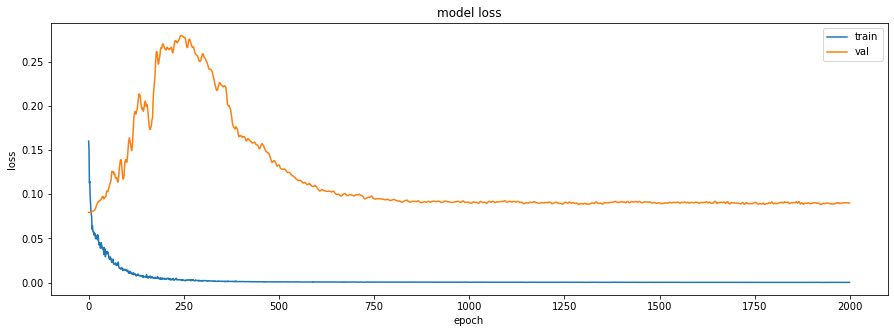

In [38]:
#512 'tanh'  batch_size = 1000, epochs = 2000
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

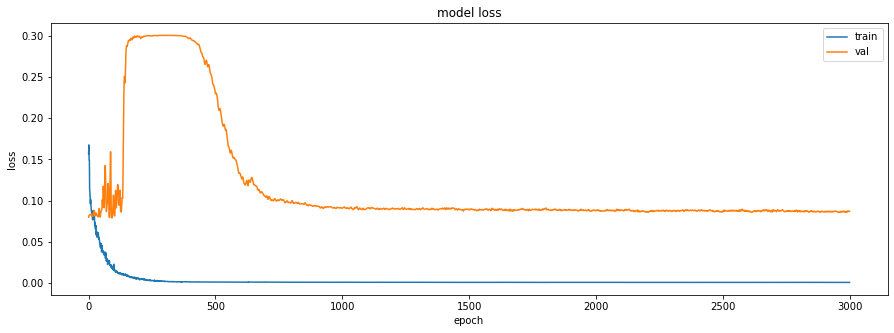

In [54]:
#batch_size = 2000, epochs = 3000, 2048 'tanh'
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

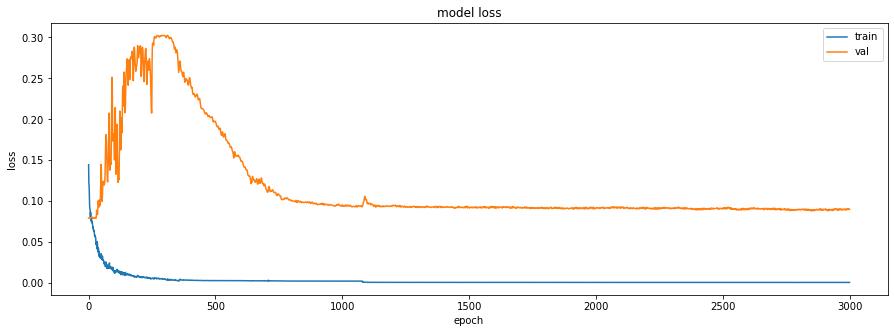

In [40]:
#batch_size = 1000, epochs = 3000, 2048 'tanh'
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

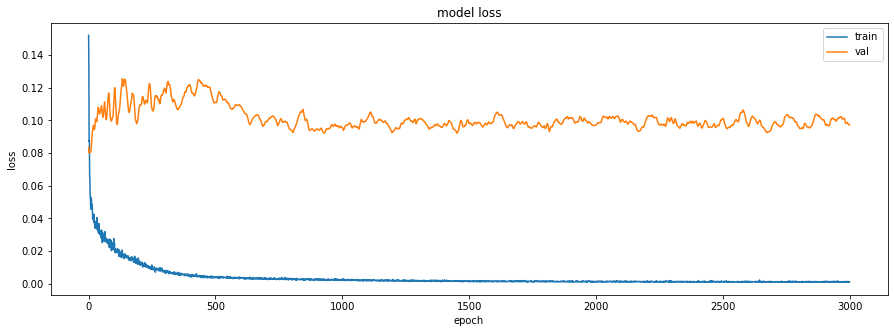

In [34]:
#batch_size = 1000, epochs = 3000, 512+64 'tanh'
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [35]:
y_pred = model.predict(X_test)

In [68]:
print(y_pred.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 3)
(320, 64, 64, 1)
(80, 64, 64, 1)
(320, 3, 1)
(80, 3)


In [6]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plot
from numpy import asarray
from numpy import unique
from numpy import argmax
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [57]:
#2048 tanh
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.0813181606366196
RMSE =  0.28516339287611864


In [41]:
#512+64 tanh
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE of CNN : ',m)
print('RMSE of CNN = ',r)

MSE =  0.10657376513939691
RMSE =  0.3264563755532995


### Resnet50

In [7]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras

In [8]:
array_X = np.zeros((320,64,64,3))
for i in range(0,len(array_X)):
    array_X[i] = X_train[i]
array_X_test = np.zeros((80,64,64,3))
for k in range(0,len(array_X_test)):
    array_X_test[k] = X_test[k]

In [42]:
print(array_X.shape)

(320, 64, 64, 3)


In [10]:
model1 = Sequential()
restnet = ResNet50(include_top=False,
                  input_shape=(64,64,3),
                  pooling='avg',classes=5,
                  weights = 'imagenet')
for layer in restnet.layers:
    layer.trainable=False
model1.add(restnet)
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(64, activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='mse',
              optimizer='adam')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                

In [ ]:
tf.config.run_functions_eagerly(True)
history1 = model1.fit(array_X,y_train, batch_size = 1000, epochs = 3000,verbose=1,validation_split=0.33)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/3000
1/1 [==============================] - 1s 1s/step - loss: 0.1448 - val_loss: 0.0887
Epoch 2/3000
1/1 [==============================] - 1s 1s/step - loss: 0.1208 - val_loss: 0.0902
Epoch 3/3000
1/1 [==============================] - 1s 1s/step - loss: 0.1104 - val_loss: 0.0897
Epoch 4/3000
1/1 [==============================] - 1s 1s/step - loss: 0.1075 - val_loss: 0.0914
Epoch 5/3000
1/1 [==============================] - 1s 1s/step - loss: 0.1067 - val_loss: 0.0943
Epoch 6/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0982 - val_loss: 0.0964
Epoch 7/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0959 - val_loss: 0.0979
Epoch 8/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0955 - val_loss: 0.0987
Epoch 9/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0887 - val_loss: 0.0996
Epoch 10/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0928 - val_loss: 0.1001
Epoch 11/3000
1/1 [==========

1/1 [==============================] - 1s 1s/step - loss: 0.0236 - val_loss: 0.1161
Epoch 168/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0254 - val_loss: 0.1158
Epoch 169/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0230 - val_loss: 0.1165
Epoch 170/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0262 - val_loss: 0.1171
Epoch 171/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0242 - val_loss: 0.1177
Epoch 172/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0238 - val_loss: 0.1177
Epoch 173/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0227 - val_loss: 0.1173
Epoch 174/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0232 - val_loss: 0.1164
Epoch 175/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0217 - val_loss: 0.1160
Epoch 176/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0261 - val_loss: 0.1160
Epoch 177/3000
1/1 [=====

Epoch 250/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0191 - val_loss: 0.1035
Epoch 251/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0198 - val_loss: 0.1030
Epoch 252/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0164 - val_loss: 0.1027
Epoch 253/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0183 - val_loss: 0.1029
Epoch 254/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0189 - val_loss: 0.1033
Epoch 255/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0192 - val_loss: 0.1040
Epoch 256/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0164 - val_loss: 0.1047
Epoch 257/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0181 - val_loss: 0.1051
Epoch 258/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0202 - val_loss: 0.1057
Epoch 259/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0174 - val_loss: 0.1057
Epoch 260/

Epoch 331/3000
1/1 [==============================] - 1s 859ms/step - loss: 0.0147 - val_loss: 0.0935
Epoch 332/3000
1/1 [==============================] - 1s 847ms/step - loss: 0.0150 - val_loss: 0.0935
Epoch 333/3000
1/1 [==============================] - 1s 843ms/step - loss: 0.0136 - val_loss: 0.0934
Epoch 334/3000
1/1 [==============================] - 1s 852ms/step - loss: 0.0163 - val_loss: 0.0935
Epoch 335/3000
1/1 [==============================] - 1s 847ms/step - loss: 0.0140 - val_loss: 0.0935
Epoch 336/3000
1/1 [==============================] - 1s 846ms/step - loss: 0.0147 - val_loss: 0.0935
Epoch 337/3000
1/1 [==============================] - 1s 855ms/step - loss: 0.0159 - val_loss: 0.0938
Epoch 338/3000
1/1 [==============================] - 1s 844ms/step - loss: 0.0144 - val_loss: 0.0939
Epoch 339/3000
1/1 [==============================] - 1s 841ms/step - loss: 0.0135 - val_loss: 0.0938
Epoch 340/3000
1/1 [==============================] - 1s 942ms/step - loss: 0.0146

1/1 [==============================] - 1s 966ms/step - loss: 0.0116 - val_loss: 0.0931
Epoch 492/3000
1/1 [==============================] - 1s 876ms/step - loss: 0.0107 - val_loss: 0.0930
Epoch 493/3000
1/1 [==============================] - 1s 853ms/step - loss: 0.0124 - val_loss: 0.0928
Epoch 494/3000
1/1 [==============================] - 1s 835ms/step - loss: 0.0102 - val_loss: 0.0924
Epoch 495/3000
1/1 [==============================] - 1s 869ms/step - loss: 0.0113 - val_loss: 0.0921
Epoch 496/3000
1/1 [==============================] - 1s 857ms/step - loss: 0.0116 - val_loss: 0.0920
Epoch 497/3000
1/1 [==============================] - 1s 892ms/step - loss: 0.0126 - val_loss: 0.0921
Epoch 498/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0111 - val_loss: 0.0921
Epoch 499/3000
1/1 [==============================] - 1s 894ms/step - loss: 0.0095 - val_loss: 0.0919
Epoch 500/3000
1/1 [==============================] - 1s 878ms/step - loss: 0.0114 - val_loss: 0.091

1/1 [==============================] - 1s 856ms/step - loss: 0.0088 - val_loss: 0.1028
Epoch 652/3000
1/1 [==============================] - 1s 821ms/step - loss: 0.0099 - val_loss: 0.1038
Epoch 653/3000
1/1 [==============================] - 1s 820ms/step - loss: 0.0098 - val_loss: 0.1052
Epoch 654/3000
1/1 [==============================] - 1s 923ms/step - loss: 0.0081 - val_loss: 0.1066
Epoch 655/3000
1/1 [==============================] - 1s 836ms/step - loss: 0.0094 - val_loss: 0.1071
Epoch 656/3000
1/1 [==============================] - 1s 834ms/step - loss: 0.0096 - val_loss: 0.1073
Epoch 657/3000
1/1 [==============================] - 1s 837ms/step - loss: 0.0097 - val_loss: 0.1072
Epoch 658/3000
1/1 [==============================] - 1s 841ms/step - loss: 0.0086 - val_loss: 0.1066
Epoch 659/3000
1/1 [==============================] - 1s 834ms/step - loss: 0.0086 - val_loss: 0.1064
Epoch 660/3000
1/1 [==============================] - 1s 841ms/step - loss: 0.0084 - val_loss: 0.

1/1 [==============================] - 1s 819ms/step - loss: 0.0080 - val_loss: 0.1167
Epoch 812/3000
1/1 [==============================] - 1s 827ms/step - loss: 0.0085 - val_loss: 0.1163
Epoch 813/3000
1/1 [==============================] - 1s 816ms/step - loss: 0.0078 - val_loss: 0.1164
Epoch 814/3000
1/1 [==============================] - 1s 866ms/step - loss: 0.0081 - val_loss: 0.1169
Epoch 815/3000
1/1 [==============================] - 1s 832ms/step - loss: 0.0090 - val_loss: 0.1175
Epoch 816/3000
1/1 [==============================] - 1s 823ms/step - loss: 0.0080 - val_loss: 0.1185
Epoch 817/3000
1/1 [==============================] - 1s 810ms/step - loss: 0.0079 - val_loss: 0.1198
Epoch 818/3000
1/1 [==============================] - 1s 821ms/step - loss: 0.0078 - val_loss: 0.1206
Epoch 819/3000
1/1 [==============================] - 1s 822ms/step - loss: 0.0084 - val_loss: 0.1205
Epoch 820/3000
1/1 [==============================] - 1s 817ms/step - loss: 0.0074 - val_loss: 0.

1/1 [==============================] - 1s 917ms/step - loss: 0.0065 - val_loss: 0.1253
Epoch 972/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0069 - val_loss: 0.1256
Epoch 973/3000
1/1 [==============================] - 1s 1s/step - loss: 0.0064 - val_loss: 0.1255
Epoch 974/3000
1/1 [==============================] - 1s 859ms/step - loss: 0.0064 - val_loss: 0.1257
Epoch 975/3000
1/1 [==============================] - 1s 864ms/step - loss: 0.0068 - val_loss: 0.1269
Epoch 976/3000
1/1 [==============================] - 1s 920ms/step - loss: 0.0072 - val_loss: 0.1280
Epoch 977/3000
1/1 [==============================] - 1s 882ms/step - loss: 0.0061 - val_loss: 0.1287
Epoch 978/3000
1/1 [==============================] - 1s 861ms/step - loss: 0.0068 - val_loss: 0.1291
Epoch 979/3000
1/1 [==============================] - 1s 871ms/step - loss: 0.0073 - val_loss: 0.1280
Epoch 980/3000
1/1 [==============================] - 1s 917ms/step - loss: 0.0068 - val_loss: 0.1262
E

Epoch 1131/3000
1/1 [==============================] - 1s 858ms/step - loss: 0.0061 - val_loss: 0.1293
Epoch 1132/3000
1/1 [==============================] - 1s 853ms/step - loss: 0.0064 - val_loss: 0.1292
Epoch 1133/3000
1/1 [==============================] - 1s 857ms/step - loss: 0.0063 - val_loss: 0.1287
Epoch 1134/3000
1/1 [==============================] - 1s 882ms/step - loss: 0.0062 - val_loss: 0.1277
Epoch 1135/3000
1/1 [==============================] - 1s 871ms/step - loss: 0.0060 - val_loss: 0.1271
Epoch 1136/3000
1/1 [==============================] - 1s 870ms/step - loss: 0.0055 - val_loss: 0.1272
Epoch 1137/3000
1/1 [==============================] - 1s 869ms/step - loss: 0.0064 - val_loss: 0.1269
Epoch 1138/3000
1/1 [==============================] - 1s 871ms/step - loss: 0.0059 - val_loss: 0.1262
Epoch 1139/3000
1/1 [==============================] - 1s 882ms/step - loss: 0.0063 - val_loss: 0.1260
Epoch 1140/3000
1/1 [==============================] - 1s 869ms/step - lo

Epoch 1211/3000
1/1 [==============================] - 1s 882ms/step - loss: 0.0058 - val_loss: 0.1270
Epoch 1212/3000
1/1 [==============================] - 1s 903ms/step - loss: 0.0063 - val_loss: 0.1258
Epoch 1213/3000
1/1 [==============================] - 1s 953ms/step - loss: 0.0062 - val_loss: 0.1249
Epoch 1214/3000
1/1 [==============================] - 1s 886ms/step - loss: 0.0064 - val_loss: 0.1245
Epoch 1215/3000
1/1 [==============================] - 1s 860ms/step - loss: 0.0052 - val_loss: 0.1238
Epoch 1216/3000
1/1 [==============================] - 1s 877ms/step - loss: 0.0058 - val_loss: 0.1233
Epoch 1217/3000
1/1 [==============================] - 1s 873ms/step - loss: 0.0061 - val_loss: 0.1236
Epoch 1218/3000
1/1 [==============================] - 1s 918ms/step - loss: 0.0062 - val_loss: 0.1259
Epoch 1219/3000
1/1 [==============================] - 1s 913ms/step - loss: 0.0061 - val_loss: 0.1281
Epoch 1220/3000
1/1 [==============================] - 1s 900ms/step - lo

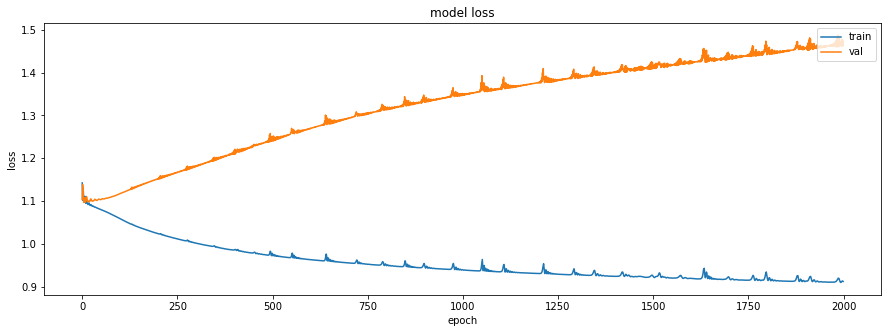

In [45]:
plt.figure(figsize=(15,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss of Resnet50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

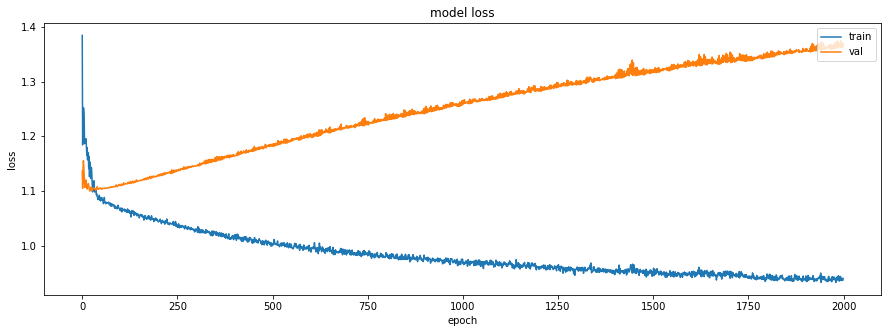

In [46]:
#round 2 
plt.figure(figsize=(15,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss of Resnet50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [53]:
y_pred = model1.predict(array_X_test)
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE of Resnet50 : ',m)
print('RMSE of Resnet50 : ',r)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


MSE =  0.1403940080788417
RMSE =  0.3746918841913202


### VGG19

In [14]:
from keras.applications.vgg19 import VGG19

In [15]:
model2 = Sequential()
vgg_19 = VGG19(include_top=False,
                  input_shape=(64,64,3),
                  pooling='avg',classes=5,
                  weights = 'imagenet')
for layer in vgg_19.layers:
    layer.trainable=False
model2.add(vgg_19)
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(64, activation='tanh'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='mse',
              optimizer='adam')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 20,057,411
Trainable params: 33,027
Non-trainable params: 20,024,384
_________________________________________________________________


In [16]:
tf.config.run_functions_eagerly(True)
history2 = model2.fit(array_X,y_train, batch_size = 1000, epochs = 3000,verbose=1,validation_split=0.33)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/3000
1/1 [==============================] - 3s 3s/step - loss: 0.1035 - val_loss: 0.0847
Epoch 2/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0937 - val_loss: 0.0869
Epoch 3/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0955 - val_loss: 0.0999
Epoch 4/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0877 - val_loss: 0.0989
Epoch 5/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0975 - val_loss: 0.0906
Epoch 6/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0893 - val_loss: 0.0842
Epoch 7/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0813 - val_loss: 0.0823
Epoch 8/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0873 - val_loss: 0.0835
Epoch 9/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0800 - val_loss: 0.0841
Epoch 10/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0848 - val_loss: 0.0835
Epoch 11/3000
1/1 [==========

1/1 [==============================] - 2s 2s/step - loss: 0.0479 - val_loss: 0.0827
Epoch 168/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0496 - val_loss: 0.0826
Epoch 169/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0479 - val_loss: 0.0827
Epoch 170/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0496 - val_loss: 0.0829
Epoch 171/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0489 - val_loss: 0.0828
Epoch 172/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0486 - val_loss: 0.0826
Epoch 173/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0494 - val_loss: 0.0827
Epoch 174/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0477 - val_loss: 0.0827
Epoch 175/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0481 - val_loss: 0.0829
Epoch 176/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0487 - val_loss: 0.0830
Epoch 177/3000
1/1 [=====

Epoch 250/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0428 - val_loss: 0.0837
Epoch 251/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0443 - val_loss: 0.0837
Epoch 252/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0434 - val_loss: 0.0836
Epoch 253/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0448 - val_loss: 0.0837
Epoch 254/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0452 - val_loss: 0.0838
Epoch 255/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0432 - val_loss: 0.0839
Epoch 256/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0446 - val_loss: 0.0838
Epoch 257/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0438 - val_loss: 0.0838
Epoch 258/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0431 - val_loss: 0.0839
Epoch 259/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0437 - val_loss: 0.0839
Epoch 260/

Epoch 415/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0364 - val_loss: 0.0896
Epoch 416/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0344 - val_loss: 0.0893
Epoch 417/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0344 - val_loss: 0.0893
Epoch 418/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0363 - val_loss: 0.0895
Epoch 419/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0344 - val_loss: 0.0896
Epoch 420/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0365 - val_loss: 0.0897
Epoch 421/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0349 - val_loss: 0.0894
Epoch 422/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0345 - val_loss: 0.0896
Epoch 423/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0354 - val_loss: 0.0899
Epoch 424/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0354 - val_loss: 0.0903
Epoch 425/

Epoch 580/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0297 - val_loss: 0.0974
Epoch 581/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0300 - val_loss: 0.0976
Epoch 582/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0300 - val_loss: 0.0981
Epoch 583/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0291 - val_loss: 0.0987
Epoch 584/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0303 - val_loss: 0.0981
Epoch 585/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0301 - val_loss: 0.0977
Epoch 586/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0306 - val_loss: 0.0982
Epoch 587/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0301 - val_loss: 0.0990
Epoch 588/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0297 - val_loss: 0.0987
Epoch 589/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0307 - val_loss: 0.0983
Epoch 590/

Epoch 745/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0252 - val_loss: 0.1047
Epoch 746/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0255 - val_loss: 0.1060
Epoch 747/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0260 - val_loss: 0.1070
Epoch 748/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0257 - val_loss: 0.1057
Epoch 749/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0246 - val_loss: 0.1050
Epoch 750/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0248 - val_loss: 0.1060
Epoch 751/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0240 - val_loss: 0.1071
Epoch 752/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0250 - val_loss: 0.1060
Epoch 753/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0241 - val_loss: 0.1050
Epoch 754/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0262 - val_loss: 0.1059
Epoch 755/

Epoch 910/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0230 - val_loss: 0.1120
Epoch 911/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0213 - val_loss: 0.1125
Epoch 912/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0224 - val_loss: 0.1108
Epoch 913/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0222 - val_loss: 0.1117
Epoch 914/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0209 - val_loss: 0.1123
Epoch 915/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0205 - val_loss: 0.1123
Epoch 916/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0223 - val_loss: 0.1114
Epoch 917/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0201 - val_loss: 0.1112
Epoch 918/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0198 - val_loss: 0.1120
Epoch 919/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0215 - val_loss: 0.1131
Epoch 920/

1/1 [==============================] - 2s 2s/step - loss: 0.0200 - val_loss: 0.1207
Epoch 1075/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0213 - val_loss: 0.1169
Epoch 1076/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0196 - val_loss: 0.1168
Epoch 1077/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0226 - val_loss: 0.1185
Epoch 1078/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0192 - val_loss: 0.1208
Epoch 1079/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0212 - val_loss: 0.1167
Epoch 1080/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0191 - val_loss: 0.1165
Epoch 1081/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0209 - val_loss: 0.1187
Epoch 1082/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0181 - val_loss: 0.1187
Epoch 1083/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0195 - val_loss: 0.1164
Epoch 1084/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0176 - val_loss: 0.1199
Epoch 1157/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0178 - val_loss: 0.1193
Epoch 1158/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0171 - val_loss: 0.1193
Epoch 1159/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0184 - val_loss: 0.1201
Epoch 1160/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0172 - val_loss: 0.1204
Epoch 1161/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0194 - val_loss: 0.1192
Epoch 1162/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0179 - val_loss: 0.1192
Epoch 1163/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0177 - val_loss: 0.1194
Epoch 1164/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0178 - val_loss: 0.1199
Epoch 1165/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0185 - val_loss: 0.1195
Epoch 1166/3000


1/1 [==============================] - 3s 3s/step - loss: 0.0170 - val_loss: 0.1218
Epoch 1239/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0172 - val_loss: 0.1227
Epoch 1240/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0187 - val_loss: 0.1226
Epoch 1241/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0177 - val_loss: 0.1217
Epoch 1242/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0164 - val_loss: 0.1219
Epoch 1243/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0167 - val_loss: 0.1226
Epoch 1244/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0169 - val_loss: 0.1224
Epoch 1245/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0171 - val_loss: 0.1217
Epoch 1246/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0178 - val_loss: 0.1226
Epoch 1247/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0175 - val_loss: 0.1217
Epoch 1248/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0165 - val_loss: 0.1246
Epoch 1321/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0159 - val_loss: 0.1230
Epoch 1322/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0162 - val_loss: 0.1227
Epoch 1323/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0164 - val_loss: 0.1251
Epoch 1324/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0179 - val_loss: 0.1237
Epoch 1325/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0167 - val_loss: 0.1230
Epoch 1326/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0170 - val_loss: 0.1233
Epoch 1327/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0161 - val_loss: 0.1256
Epoch 1328/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0173 - val_loss: 0.1239
Epoch 1329/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0176 - val_loss: 0.1226
Epoch 1330/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0162 - val_loss: 0.1249
Epoch 1403/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0152 - val_loss: 0.1260
Epoch 1404/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0158 - val_loss: 0.1265
Epoch 1405/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0159 - val_loss: 0.1258
Epoch 1406/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0157 - val_loss: 0.1255
Epoch 1407/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0152 - val_loss: 0.1256
Epoch 1408/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0149 - val_loss: 0.1261
Epoch 1409/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0158 - val_loss: 0.1257
Epoch 1410/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0147 - val_loss: 0.1253
Epoch 1411/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0152 - val_loss: 0.1255
Epoch 1412/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0154 - val_loss: 0.1263
Epoch 1485/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0156 - val_loss: 0.1270
Epoch 1486/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0146 - val_loss: 0.1284
Epoch 1487/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0150 - val_loss: 0.1269
Epoch 1488/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0141 - val_loss: 0.1266
Epoch 1489/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0158 - val_loss: 0.1276
Epoch 1490/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0142 - val_loss: 0.1289
Epoch 1491/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0142 - val_loss: 0.1270
Epoch 1492/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0144 - val_loss: 0.1262
Epoch 1493/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0160 - val_loss: 0.1273
Epoch 1494/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0156 - val_loss: 0.1284
Epoch 1567/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0163 - val_loss: 0.1304
Epoch 1568/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0155 - val_loss: 0.1296
Epoch 1569/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0153 - val_loss: 0.1287
Epoch 1570/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0165 - val_loss: 0.1285
Epoch 1571/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0151 - val_loss: 0.1322
Epoch 1572/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0171 - val_loss: 0.1291
Epoch 1573/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0143 - val_loss: 0.1290
Epoch 1574/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0174 - val_loss: 0.1282
Epoch 1575/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0141 - val_loss: 0.1319
Epoch 1576/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0136 - val_loss: 0.1304
Epoch 1649/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0140 - val_loss: 0.1304
Epoch 1650/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0140 - val_loss: 0.1290
Epoch 1651/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0138 - val_loss: 0.1295
Epoch 1652/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0141 - val_loss: 0.1309
Epoch 1653/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - val_loss: 0.1300
Epoch 1654/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0142 - val_loss: 0.1292
Epoch 1655/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0138 - val_loss: 0.1300
Epoch 1656/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0130 - val_loss: 0.1309
Epoch 1657/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - val_loss: 0.1295
Epoch 1658/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0124 - val_loss: 0.1303
Epoch 1731/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0127 - val_loss: 0.1309
Epoch 1732/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0131 - val_loss: 0.1310
Epoch 1733/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0130 - val_loss: 0.1310
Epoch 1734/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0130 - val_loss: 0.1309
Epoch 1735/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - val_loss: 0.1311
Epoch 1736/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - val_loss: 0.1316
Epoch 1737/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0140 - val_loss: 0.1308
Epoch 1738/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - val_loss: 0.1324
Epoch 1739/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0157 - val_loss: 0.1308
Epoch 1740/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0123 - val_loss: 0.1327
Epoch 1813/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0125 - val_loss: 0.1319
Epoch 1814/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0130 - val_loss: 0.1323
Epoch 1815/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0126 - val_loss: 0.1329
Epoch 1816/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0117 - val_loss: 0.1324
Epoch 1817/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0128 - val_loss: 0.1323
Epoch 1818/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0117 - val_loss: 0.1327
Epoch 1819/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0113 - val_loss: 0.1334
Epoch 1820/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0129 - val_loss: 0.1324
Epoch 1821/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - val_loss: 0.1323
Epoch 1822/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0108 - val_loss: 0.1337
Epoch 1895/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0119 - val_loss: 0.1338
Epoch 1896/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0112 - val_loss: 0.1338
Epoch 1897/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0124 - val_loss: 0.1344
Epoch 1898/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0123 - val_loss: 0.1344
Epoch 1899/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0123 - val_loss: 0.1335
Epoch 1900/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0121 - val_loss: 0.1343
Epoch 1901/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - val_loss: 0.1342
Epoch 1902/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0125 - val_loss: 0.1340
Epoch 1903/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - val_loss: 0.1343
Epoch 1904/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0118 - val_loss: 0.1347
Epoch 1977/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0119 - val_loss: 0.1351
Epoch 1978/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0121 - val_loss: 0.1346
Epoch 1979/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0124 - val_loss: 0.1351
Epoch 1980/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0118 - val_loss: 0.1347
Epoch 1981/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0119 - val_loss: 0.1349
Epoch 1982/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0127 - val_loss: 0.1346
Epoch 1983/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0120 - val_loss: 0.1348
Epoch 1984/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.1362
Epoch 1985/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - val_loss: 0.1343
Epoch 1986/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0123 - val_loss: 0.1361
Epoch 2059/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0114 - val_loss: 0.1358
Epoch 2060/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0116 - val_loss: 0.1370
Epoch 2061/3000
1/1 [==============================] - 3s 3s/step - loss: 0.0126 - val_loss: 0.1372
Epoch 2062/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0118 - val_loss: 0.1359
Epoch 2063/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0125 - val_loss: 0.1362
Epoch 2064/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0112 - val_loss: 0.1380
Epoch 2065/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0129 - val_loss: 0.1361
Epoch 2066/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0108 - val_loss: 0.1358
Epoch 2067/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0123 - val_loss: 0.1367
Epoch 2068/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0125 - val_loss: 0.1374
Epoch 2141/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0112 - val_loss: 0.1373
Epoch 2142/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0116 - val_loss: 0.1377
Epoch 2143/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0123 - val_loss: 0.1370
Epoch 2144/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0104 - val_loss: 0.1382
Epoch 2145/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0128 - val_loss: 0.1371
Epoch 2146/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0118 - val_loss: 0.1368
Epoch 2147/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0113 - val_loss: 0.1381
Epoch 2148/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.1373
Epoch 2149/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1371
Epoch 2150/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0115 - val_loss: 0.1382
Epoch 2223/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0103 - val_loss: 0.1381
Epoch 2224/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1382
Epoch 2225/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1385
Epoch 2226/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0115 - val_loss: 0.1383
Epoch 2227/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0119 - val_loss: 0.1378
Epoch 2228/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0110 - val_loss: 0.1393
Epoch 2229/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.1380
Epoch 2230/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0112 - val_loss: 0.1378
Epoch 2231/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0114 - val_loss: 0.1387
Epoch 2232/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0142 - val_loss: 0.1400
Epoch 2305/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0120 - val_loss: 0.1417
Epoch 2306/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0131 - val_loss: 0.1389
Epoch 2307/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0107 - val_loss: 0.1391
Epoch 2308/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0115 - val_loss: 0.1400
Epoch 2309/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0101 - val_loss: 0.1397
Epoch 2310/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0116 - val_loss: 0.1385
Epoch 2311/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0116 - val_loss: 0.1387
Epoch 2312/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0100 - val_loss: 0.1406
Epoch 2313/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0128 - val_loss: 0.1386
Epoch 2314/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1408
Epoch 2387/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0104 - val_loss: 0.1402
Epoch 2388/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0097 - val_loss: 0.1397
Epoch 2389/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0107 - val_loss: 0.1403
Epoch 2390/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0098 - val_loss: 0.1409
Epoch 2391/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1399
Epoch 2392/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0107 - val_loss: 0.1398
Epoch 2393/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1406
Epoch 2394/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0100 - val_loss: 0.1403
Epoch 2395/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1398
Epoch 2396/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0107 - val_loss: 0.1423
Epoch 2469/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - val_loss: 0.1407
Epoch 2470/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0110 - val_loss: 0.1413
Epoch 2471/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.1418
Epoch 2472/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.1411
Epoch 2473/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0103 - val_loss: 0.1420
Epoch 2474/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0124 - val_loss: 0.1407
Epoch 2475/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1424
Epoch 2476/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0129 - val_loss: 0.1412
Epoch 2477/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0106 - val_loss: 0.1415
Epoch 2478/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1416
Epoch 2551/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0102 - val_loss: 0.1419
Epoch 2552/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1425
Epoch 2553/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0102 - val_loss: 0.1418
Epoch 2554/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0094 - val_loss: 0.1418
Epoch 2555/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0098 - val_loss: 0.1421
Epoch 2556/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0097 - val_loss: 0.1425
Epoch 2557/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1419
Epoch 2558/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0097 - val_loss: 0.1418
Epoch 2559/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0095 - val_loss: 0.1422
Epoch 2560/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0114 - val_loss: 0.1429
Epoch 2633/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0097 - val_loss: 0.1435
Epoch 2634/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1433
Epoch 2635/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0102 - val_loss: 0.1427
Epoch 2636/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1438
Epoch 2637/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0101 - val_loss: 0.1433
Epoch 2638/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0094 - val_loss: 0.1430
Epoch 2639/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0113 - val_loss: 0.1425
Epoch 2640/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1433
Epoch 2641/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0095 - val_loss: 0.1434
Epoch 2642/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0090 - val_loss: 0.1440
Epoch 2715/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0087 - val_loss: 0.1436
Epoch 2716/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0096 - val_loss: 0.1438
Epoch 2717/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0090 - val_loss: 0.1444
Epoch 2718/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.1435
Epoch 2719/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.1440
Epoch 2720/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0097 - val_loss: 0.1436
Epoch 2721/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0094 - val_loss: 0.1437
Epoch 2722/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0101 - val_loss: 0.1441
Epoch 2723/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0099 - val_loss: 0.1435
Epoch 2724/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0093 - val_loss: 0.1447
Epoch 2797/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1439
Epoch 2798/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0091 - val_loss: 0.1440
Epoch 2799/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0086 - val_loss: 0.1451
Epoch 2800/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0100 - val_loss: 0.1443
Epoch 2801/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.1441
Epoch 2802/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1450
Epoch 2803/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.1449
Epoch 2804/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0094 - val_loss: 0.1446
Epoch 2805/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0090 - val_loss: 0.1446
Epoch 2806/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1461
Epoch 2879/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.1456
Epoch 2880/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0087 - val_loss: 0.1453
Epoch 2881/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0088 - val_loss: 0.1457
Epoch 2882/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.1458
Epoch 2883/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0082 - val_loss: 0.1453
Epoch 2884/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0095 - val_loss: 0.1456
Epoch 2885/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.1458
Epoch 2886/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0086 - val_loss: 0.1452
Epoch 2887/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.1454
Epoch 2888/3000


1/1 [==============================] - 2s 2s/step - loss: 0.0081 - val_loss: 0.1477
Epoch 2961/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1466
Epoch 2962/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0084 - val_loss: 0.1465
Epoch 2963/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1478
Epoch 2964/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0095 - val_loss: 0.1476
Epoch 2965/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1466
Epoch 2966/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0104 - val_loss: 0.1469
Epoch 2967/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0083 - val_loss: 0.1474
Epoch 2968/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0092 - val_loss: 0.1464
Epoch 2969/3000
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.1463
Epoch 2970/3000


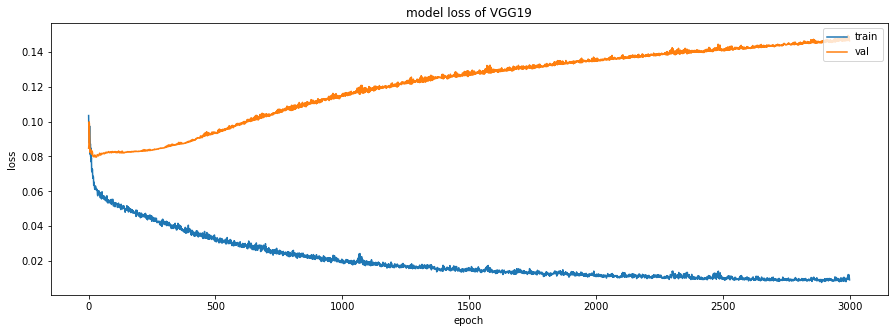

In [17]:
plt.figure(figsize=(15,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss of VGG19')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [18]:
y_pred = model2.predict(array_X_test)
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE of VGG19 : ',m)
print('RMSE of VGG19 : ',r)

MSE of VGG19 :  0.14059926706657025
RMSE of VGG19 :  0.37496568785232903
